In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [33]:
df = pd.read_csv('data/input_morphoJ.csv')
df.iloc[:, 1:]

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x95,y95,x96,y96,x97,y97,x98,y98,x99,y99
0,190.0,285.003137,186.634417,293.368721,182.561727,301.441411,177.074823,308.928314,171.587919,316.415218,...,169.003137,266.179026,175.909525,268.087338,183.982215,267.979077,189.469118,275.465981,190.0,285.003137
1,178.0,273.003137,173.249070,280.754067,167.791034,288.212103,161.625891,295.377246,156.874962,303.128176,...,156.245197,256.751666,163.994522,251.996863,172.039949,256.036812,177.003137,263.699821,178.0,273.003137
2,192.0,302.003137,186.765535,310.237603,180.823962,318.179175,174.882390,326.120747,170.003137,334.502347,...,164.954615,284.996863,174.114626,283.996863,183.779984,285.776847,191.014450,292.011312,192.0,302.003137
3,177.0,255.003137,173.034324,261.968813,167.654435,268.348702,162.274545,274.728592,157.601763,281.401374,...,157.921746,236.918609,165.669217,236.996863,173.317564,239.314426,176.576133,246.572995,177.0,255.003137
4,170.0,265.003137,163.928069,272.003137,156.605380,277.397757,149.261624,282.741513,141.624974,287.378163,...,148.750585,252.996863,156.236730,247.996863,164.975616,247.972479,169.612266,255.609128,170.0,265.003137
5,138.0,284.003137,131.425038,290.578100,125.557182,297.445955,119.003137,304.029582,115.003137,311.671129,...,118.969881,265.966744,126.184738,266.996863,134.755845,266.752707,138.003137,274.706036,138.0,284.003137
6,131.0,193.003137,129.003137,198.981368,126.325517,204.677620,124.003137,210.521018,121.651034,216.352104,...,121.272720,171.996863,127.176530,174.173393,130.574432,179.571295,131.003137,186.199078,131.0,193.003137
7,115.0,163.003137,113.003137,168.321808,110.551169,173.451968,107.619647,178.383490,104.688125,183.315013,...,99.325174,155.996863,104.642546,153.996863,110.264550,153.261413,114.003137,157.272852,115.0,163.003137
8,124.0,219.003137,121.549809,225.453328,117.685405,231.317733,113.746856,237.003137,109.663703,242.339435,...,106.619725,212.377138,112.684662,208.996863,119.321328,206.996863,124.003137,211.539344,124.0,219.003137
9,122.0,185.003137,118.716378,190.286759,114.725649,195.277488,109.734921,199.268216,105.744192,204.258945,...,104.504971,172.996863,111.148714,172.996863,116.974565,174.971427,121.551080,178.547942,122.0,185.003137


In [29]:
class Shape(object):
        def __init__(self, landmarks, name):
            self.xy = np.array(landmarks, dtype=np.float)
            self.nr_landmarks =  self.xy.shape[0]/2
            self.name = name
            self.centroid = self.get_centroid()

        def load_shape(self, shape):
            pass

        def translate_shape(self, direction):

            T = np.identity(3)
            T[:2, 2] = direction[:2]

            return T

        def get_centroid(self):
            centroid = self.xy.mean(0)
            return centroid

        def align_shape(self, mean_shape):
            """
            Procrustes fit
            """
            n, m = mean_shape.xy.shape
            ny, my = self.xy.shape
            reflection = 'best'
            scaling = True

            X0 = mean_shape.xy - mean_shape.centroid
            Y0 = self.xy - self.centroid

            ssX = (X0**2.).sum()
            ssY = (Y0**2.).sum()
            
            # centred Frobenius norm
            normX = np.sqrt(ssX)
            normY = np.sqrt(ssY)

            # scale to equal (unit) norm
            X0 /= normX
            Y0 /= normY

            if my < m:
                Y0 = np.concatenate((Y0, np.zeros(n, m-my)),0)
            # optimum rotation matrix of Y
            A = np.dot(X0.T, Y0)
            U,s,Vt = np.linalg.svd(A,full_matrices=False)
            V = Vt.T
            T = np.dot(V, U.T)

            if reflection is not 'best':

                # does the current solution use a reflection?
                have_reflection = np.linalg.det(T) < 0
                # if that's not what was specified, force another reflection
                if reflection != have_reflection:
                    V[:,-1] *= -1
                    s[-1] *= -1
                    T = np.dot(V, U.T)

            traceTA = s.sum()

            if scaling:

                # optimum scaling of Y
                b = traceTA * normX / normY

                # standarised distance between X and b*Y*T + c
                d = 1 - traceTA**2

                # transformed coords
                Z = normX*traceTA*np.dot(Y0, T) + mean_shape.centroid

            else:
                b = 1
                d = 1 + ssY/ssX - 2 * traceTA * normY / normX
                Z = normY*np.dot(Y0, T) + mean_shape.centroid

            # transformation matrix
            if my < m:
                T = T[:my,:]
            c = mean_shape.centroid - b*np.dot(self.centroid, T)

            #transformation values 
            tform = {'rotation':T, 'scale':b, 'translation':c}

            self.xy = Z.copy()
            #print d

        def plot_shape(self, color=''):
            return plt.plot(self.xy[:,1], self.xy[:,0], 'o'+color)

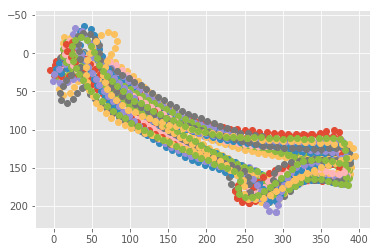

In [32]:
plt.style.use('ggplot')

my_shapes = list()
for index, row in df.iterrows():
    my_shapes.append(Shape(row[1:].values.reshape((100, 2)), row[0]))

for shape in my_shapes:
    shape.align_shape(my_shapes[0])    
for shape in my_shapes[:20]:
    shape.plot_shape()

plt.axes().set_aspect('equal', 'datalim')
plt.gca().invert_yaxis()
plt.show()

In [38]:
df_procrustes = pd.DataFrame(columns=range(200))
for index, shape in enumerate(my_shapes):
    df_procrustes.loc[index] = my_shapes[index].xy.reshape((200,))
df_procrustes

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,190.000000,285.003137,186.634417,293.368721,182.561727,301.441411,177.074823,308.928314,171.587919,316.415218,...,169.003137,266.179026,175.909525,268.087338,183.982215,267.979077,189.469118,275.465981,190.000000,285.003137
1,188.552136,276.224726,183.799080,284.148822,178.324490,291.782130,172.128366,299.124651,167.375310,307.048747,...,166.282847,259.919559,174.112585,255.011364,182.329062,259.038934,187.448210,266.778912,188.552136,276.224726
2,185.235871,286.046898,180.314055,293.868082,174.721298,301.414931,169.128540,308.961781,164.543770,316.920776,...,159.548674,270.057654,168.219484,269.071027,177.380897,270.715043,184.259335,276.588243,185.235871,286.046898
3,191.135097,294.304242,186.616981,302.089876,180.516143,309.204543,174.415304,316.319211,169.105827,323.769361,...,169.878118,273.818219,178.577796,273.978022,187.145368,276.651646,190.737355,284.833264,191.135097,294.304242
4,195.427835,282.107958,189.303030,289.865511,181.766472,295.974149,174.204961,302.029631,166.296544,307.346121,...,172.195294,270.362038,179.925452,264.665813,189.235487,264.209373,194.551977,272.117791,195.427835,282.107958
5,180.133087,280.804090,174.073571,288.464410,168.787463,296.344237,162.750826,304.011050,159.507710,312.470717,...,158.082555,264.302636,165.735502,264.499101,174.648354,263.200962,179.004579,271.103675,180.133087,280.804090
6,187.042375,281.071165,184.186979,289.592489,180.361311,297.710823,177.041962,306.039450,173.680247,314.350481,...,173.201457,251.106098,181.616423,254.217571,186.453939,261.918807,187.056148,271.369610,187.042375,281.071165
7,196.136252,255.384120,192.972275,263.974177,189.073090,272.265070,184.399202,280.240728,179.725314,288.216386,...,170.808929,244.252786,179.356645,240.976651,188.407948,239.735012,194.472309,246.160977,196.136252,255.384120
8,190.678369,277.971741,188.346307,286.889981,184.051961,295.232387,179.633527,303.347630,174.973084,311.019836,...,166.644430,271.656209,174.217039,266.298749,182.746490,262.692941,189.615033,268.057118,190.678369,277.971741
9,190.279652,268.895695,185.549275,276.791198,179.765774,284.270442,172.478818,290.294413,166.695316,297.773657,...,164.108901,251.555542,173.937408,251.395482,182.603528,254.176226,189.460020,259.356934,190.279652,268.895695


In [39]:
from sklearn.decomposition import PCA # using randomized Singular Value Decomposition 
Xp = PCA(svd_solver='randomized', n_components=2, random_state=1).fit_transform(df_procrustes.values)
Xp

array([[322.75638744,  88.27992276],
       [379.13273634, 108.67098736],
       [312.86159512,  71.01294734],
       ...,
       [154.21977573,  19.86465212],
       [239.02828359,  58.6501974 ],
       [-36.73862403, -42.70562743]])

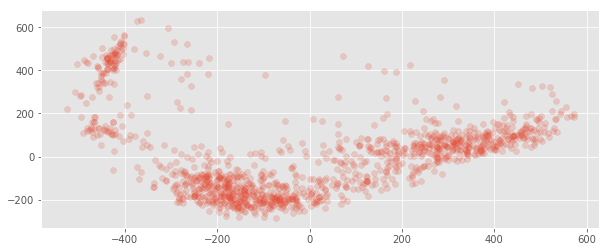

In [46]:
# get the product class 
plt.clf()
colors = plt.get_cmap("hsv")

plt.figure(figsize=(10, 4))
plt.scatter(Xp[:, 0], Xp[:, 1], alpha=0.2)
plt.show()

number of estimated clusters : 4


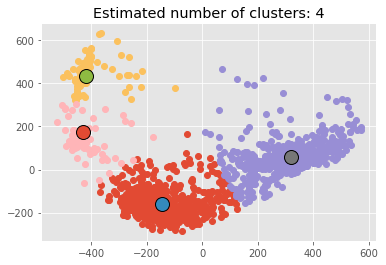

In [61]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

bandwidth = estimate_bandwidth(Xp, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(Xp)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

plt.figure(1)
plt.clf()

for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(Xp[my_members, 0], Xp[my_members, 1], 'o')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


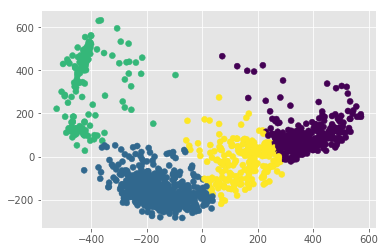

In [54]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(Xp)
plt.scatter(Xp[:, 0], Xp[:, 1], c=y_pred)
plt.show()